## Sentimental Analysis Amazon Musical Instruments Reviews

### 1) Definição do problema

##### *1.1) O que é análise de sentimentos?*
&emsp;&emsp;Uma tendência relativamente mais recente na análise de textos vai além da detecção de tópicos e tenta identificar a emoção por trás de um texto. Isso é chamado de análise de sentimentos, ou também de mineração de opinião e IA de emoção.<br/>

&emsp;&emsp;A análise de sentimentos é uma mineração contextual de um texto que identifica e extrai informações subjetivas no material de origem. Ela ajuda as empresas a entenderem o sentimento social de sua marca, produto ou serviço.<br/>

&emsp;&emsp;Um sistema de análise de sentimentos para conteúdo textual combina o processamento de linguagem natural (PLN) e técnicas de aprendizado de máquina para atribuir pontuações ponderadas de sentimento às sentenças. Com os recentes avanços na aprendizagem profunda, conhecida como Deep Learning, a capacidade dos algoritmos de analisar textos melhorou consideravelmente. O uso de técnicas avançadas de inteligência artificial se tornou eficaz para identificar sentimentos de usuários na web.<br/>

&emsp;&emsp;Quando uma empresa deseja entender o que estão falando sobre ela e qual a reputação de seus produtos online, uma das formas de se fazer isso é utilizando machine learning, assim como sua subárea chamada Deep Learning. Nesse sentido, uma das técnicas recomendadas é a análise de sentimentos, que consiste em extrair informações de textos a partir de linguagem natural.<br/>

&emsp;&emsp;O objetivo dessa técnica é classificar sentenças, ou um conjunto de sentenças, como **positivas**, **negativas** ou **neutras**. Essa classificação é realizada automaticamente e extrai informações subjetivas de textos, criando conhecimento estruturado que pode ser utilizado por um sistema.
<br/>
##### *1.2) Objetivos deste projeto*
&emsp;&emsp;Este projeto tem por objetivo, a implementação de um modelo de Machine Learning e Deep Learning capaz de, dado um texto de entrada, nos dizer se esse texto é uma avaliação positiva, neutra ou uma avaliação negativa. Faremos isso com o dataset obtido do Kaggle e vamos aplicar as principais técnicas de NLP (Natural Language Processing) para tentar obter o contexto das mensagens e dessa forma realizar a classificação.<br/>

**Dataset**<br/>
&emsp;&emsp;O dataset 'Amazon Musical Instruments Reviews' é um conjunto de registros sobre as avaliações dos usuários em determinados produtos comprados pelo site da Amazon. O dataset possui 10261 registros de avaliações, porém os dados estão muito desbalanceados, o que é comum nesse tipo de problema e isso vai nos gerar alguns problemas, vamos tentar contorná-los. O link para o a obtenção do dataset está em: https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?select=Musical_instruments_reviews.csv

**Um pouco sobre Processamento de linguagem natural**<br/>
&emsp;&emsp;Processamento de linguagem natural (PLN) é uma vertente da inteligência artificial que ajuda computadores a entender, interpretar e manipular a linguagem humana. O PLN resulta de diversas disciplinas, incluindo ciência da computação e linguística computacional, que buscam preencher a lacuna entre a comunicação humana e o entendimento dos computadores.<br/>

**Algoritmos de Machine Learning**<br/>
&emsp;&emsp;Para este projeto vamos utilizar os dois principais algoritmos de Machine Learning que resolvem problemas de processamento de linguagem natural, o mais clássico e também mais famoso Naive Bayes e o algoritmo que ganhou bastante destaque nos últimos anos por ser o principal algoritmo campeão nas competições Kaggle, o XGBoost (Extreme Gradient Boosting).

**Algoritmos de Deep Learning**<br/>
&emsp;&emsp;Se tratando de problemas desse tipo, atualmente o que há de mais moderno e eficiente são as redes neurais profundas. Vamos aplicá-las nesse projeto. Para NLPs, que trata de dados sequenciais a principal arquitetura de rede neural utilizada são as Redes Neurais Recorrentes. Vamos utilizar dois modelos, as LSTMs e também o modelo BERT, que serão explicados em detalhes mais adiante.


##### *7.1) Resultados obtidos*

Este projeto se propôs a realizar a classificação de análise de sentimentos de usuários em relação a avaliação de produtos musicias vendidos pela Amazon. No decorrer deste notebook fizemos várias transformações nos dados a fim de deixá-los mais limpos para daí então aplicar os modelos de Machine Learning e Deep Learning.<br/>

O projeto teve uma enorme dificuldade por conta do dataset estar muito desbalanceado, mas apesar disso, ainda conseguimos obter bons resultados em alguns modelos de Machine Learning.<br/>

A primeira parte foi aplicar os algoritmos de Machine Learning, aplicamos o Naive Bayes, depois aplicamos o modelo de Support Vector Machines (SVM), aplicamos também a Regressão Logística, e por fim, aplicamos o XGBoost, o algoritmo campeão das competições Kaggle.<br/>

Na segunda parte da modelagem, aplicamos os métodos mais modernos para realizar a previsão em processamento de linguagem natural, as redes neurais profundas. Utilizamos as LSTMs (Long-short-term-memory), modelo baseado em aprendizado por memória de curto e/ou longo prazo.<br/>

**Resultados obtidos**

| **MÉTODO**          | **ACURÁCIA** |
|---------------------|--------------|
| XGBoost             | 89.05        |
| Logistic Regression | 88.62        |
| SVM                 | 88.62        |
| Naive Bayes         | 88.53        |
| LSTM                | 87.79        |

In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
#Aplicação do tema que iremos utilizar.
import json
import plotly.io as pio
with open('style/amazon.json', 'r') as f:
    template = json.load(f)

pio.templates['my_theme'] = template

In [3]:
#Carregando os dados
df = pd.read_csv('data/Musical_instruments_reviews.csv')

### 2) Análise exploratória dos dados

A primeira etapa do projeto consiste em fazer uma análise exploratória dos dados, vamos fazer uma investigação a respeito da distribuição dos dados, quantidade de registros, verificar se há valores missing, etc..
<br/>

In [4]:
print('O dataset possui {} registros e possui {} colunas'.format(df.shape[0], df.shape[1]))
df.shape

O dataset possui 10261 registros e possui 9 colunas


(10261, 9)

In [5]:
#Vamos verificar os tipos de dados.
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [6]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


Este é o cabeçalho do dataset, vou contextualizar cada atributo:
* **reviewerID**: Id do indivíduo que fez a avaliação.
* **asin**: Id do produto.
* **reviewerName**: Nome do indivíduo que fez a avaliação, vale dizer que este é o nome de usuário e não o nome de pessoa física.
* **helpful**: classificação de utilidade da revisão, por exemplo 2/3.
* **reviewText**: Texto que o usuário escreveu para avaliar o produto. Este é o nosso principal atributo e também o que iremos nos concentra para realizar as previsões.
* **overall**: Nota que o usuário deu ao produto, variando de 0 a 5. Esta será nosso target, vamos converter essas avaliações para avaliações negativas, neutras e positivas.
* **summary**: Título da avaliação, nos será útil também. Vamos unir esse atributo com o atributo reviewText.
* **unixReviewTime**: Tempo que o usuário ficou na mesma tela escrevendo a avaliação.
* **reviewTime**: Data que foi realizada a avaliação.

In [7]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [8]:
df.loc[df['reviewText'].isnull()]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
2927,AF7AQHLX1UV1Z,B0002H0H4A,Smoothbassman,"[101, 105]",NaN,5.0,The Pop Rocks with the Yeti,1342656000,"07 19, 2012"
4401,AU3GYRAKBUAEU,B000CD1R7K,Jon Norris,"[189, 192]",NaN,4.0,great foot rest,1258416000,"11 17, 2009"
8739,A3N93PUHEMQU34,B004OU2IQG,"L. Su ""Flying train""","[3, 3]",NaN,5.0,To make you sound like a pro,1388102400,"12 27, 2013"
9175,AMEZJVXMSEPY0,B005FKF1PY,M. Luke,"[1, 1]",NaN,5.0,Mini tech for musicians,1319500800,"10 25, 2011"
9306,A3ABAA36CZVYNX,B005M0TKL8,Dave,"[31, 32]",NaN,5.0,"No power = No Sound, But It Sounds GREAT!",1342569600,"07 18, 2012"
9313,A3OEBPVLF35YQL,B005M0TKL8,StratDude,"[20, 21]",NaN,5.0,This would be a must-have at twice the price.,1350172800,"10 14, 2012"
9342,A3OA4DV4L81N1D,B005NACC6M,"P.K. Frary ""Gochugogi""","[4, 4]",NaN,5.0,Great sound and features for the price!,1387411200,"12 19, 2013"


Vamos atribuir apenas ' ' aos valores nulos porque logo em seguida vamos juntar os atributos 'reviewText' e 'summary' em um único atributo, dessa forma teremos informações para trabalhar, pois nenhum dado do atributo 'summary' está como nulo.

In [9]:
df.loc[df['reviewText'].isnull(), 'reviewText'] = ' '
df.loc[df['reviewText'].isnull()]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime


Vamos atribuir '.' aos valores NAN restantes. Agora o único atributo que possui valores NAN é o nome do reviewer, e esse dado é irrelevante para nosso modelo, por isso não importa o valor que ele recebe.

In [10]:
df.fillna('.', inplace=True)

Vamos fazer a junção do sumário ao texto de review em um novo atributo, o review.<br/>
E criar um novo atributo que contém o tamanho em quantidade de palavras de cada review.

In [11]:
df['review'] = df['summary'] + ' ' + df['reviewText']
df['reviewTextLen'] = df['review'].apply(lambda x: len(x.split(' ')))

In [12]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,reviewTextLen
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","good Not much to write about here, but it does...",52
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Jake The product does exactly as it should and...,105
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",It Does The Job Well The primary job of this d...,82
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,40
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",No more pops when I record my vocals. This pop...,36


In [13]:
df['overall'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

Aqui podemos perceber que este projeto será um desafio, porque nosso atributo target está completamente desbalanceado. Note que a mediana do conjunto é o próprio valor máximo, outro ponto, bem menos de 25% dos dados são valores considerados 'avaliações negativas'. Além disso, por se tratar de um intervalo de valores entre 0 e 5, notamos que a média está bem alta também.

In [14]:
list_i = df['overall'].value_counts().index
list_v = df['overall'].value_counts().values

fig = go.Figure()

for i in range(len(list_i)):
    fig.add_trace(go.Bar(
        x = [list_i[i]],
        y = [list_v[i]],
        text = [list_i[i]],
        name = str(list_i[i]) + '(' + str(list_v[i]) + ')'
    ))

fig.update_layout(
    title='<span>Quantidade total de classificações</span>', 
    autosize=False,
    width=600,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    template='my_theme'
    )

Confirmando através do gráfico o que foi visto com a descrição do atributo 'overall'. Note o quão desigual é esse conjunto de dados. Mas não vamos desanimar, *'é nas dificuldades que se fazem os mais fortes'*

In [15]:
neg_df = df.loc[df['overall'] < 3, 'reviewTextLen'].value_counts().sort_index()
neu_df = df.loc[df['overall'] == 3, 'reviewTextLen'].value_counts().sort_index()
pos_df = df.loc[df['overall'] > 3, 'reviewTextLen'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=pos_df.index, y=pos_df.values, name='Avaliações positivas', fill='tozeroy'))
fig.add_trace(go.Scatter(x=neu_df.index, y=neu_df.values, name='Avaliações neutras', fill='tozeroy'))
fig.add_trace(go.Scatter(x=neg_df.index, y=neg_df.values, name='Avaliações negativas', fill='tozeroy'))

fig.update_layout(
    title='<span>Quantidade de tipos de avaliações por quantidade de palavras</span>', 
    autosize=False,
    width=1100,
    height=600,
    xaxis=dict(title='<span>Quantidade de ocorrências de avaliações</span>'),
    yaxis=dict(title='<span>Quantidade de palavras</span>'),
    template='my_theme'
    )

fig.update_xaxes(range=[0, 200])

Bom, vamos analisar esse gráfico por partes. Primeiro as avaliações positivas. Nota que poucas pessoas fazem avaliações gigantescas, isto é, com uma enorme quantidade de palavras.</br>
Por outro lado, as avaliações neutras e negativas seguem um padrão de 2 a 6 palavras na maioria dos casos.

In [16]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,reviewTextLen
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","good Not much to write about here, but it does...",52
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Jake The product does exactly as it should and...,105
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",It Does The Job Well The primary job of this d...,82
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,40
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",No more pops when I record my vocals. This pop...,36


Por enquanto nosso dataset está assim, com as colunas originais e mais as colunas que adicionamos: 
* review: Junção dos atributos reviewText e overall;
* reviewTextLen: Tamanho em quantidade de palavras para cada review;

### 3) Pré processamento dos dados

Agora nós vamos trabalhar para tratar os dados de forma a facilitar e otimizar para que o modelo possa realizar a classificação. Essa etapa é muito importante para reduzir as dimensões do problema.

In [17]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder

##### 3.1) Mapeando variável target

A nossa primeira etapa é mapear o nosso atributo 'overall'. Vamos transformá-la no nosso target. Para isso todos os valores menores que 3 serão considerados avaliações negativas. Já os valores maiores que 3 serão considerados avaliações positivas e o próprio valor 3 será uma avaliação neutra.

In [18]:
def target_map(value):
    if value < 3:
        return 'negativo'
    elif value == 3:
        return 'neutro'
    else: #value > 3
        return 'positivo'

df['rating'] = df['overall'].apply(target_map)

##### 3.2) Seleção de atributos

Vamos selecionar somente os atributos pertinentes a criação do nosso modelo. O texto de review, o tamanho do review e a avaliação categórica.

In [19]:
df = df[['review', 'reviewTextLen', 'rating']]

##### 3.1) Limpeza dos dados

A nossa primeira etapa do pré processamento dos dados consiste em tornar os textos mais limpos e livres sujeira. Para isso vamos realizar algumas transformações, sendo: Transformar todo o texto em lowercase, remover textos entre colchetes e <>, remover links, pontuações e palavras que contenham números. Vamos utilizar as expressões regulares para realizar esse processamento.

In [20]:
#Documentação sobre Regex: https://docs.pexip.com/admin/regex_reference.htm

def limparTexto(texto):
    #Vamos transformar o texto em lowercase, remover textos entre colchetes, links, pontuações e palavras que contenham números.
    texto = str(texto).lower()
    texto = re.sub('\[.*?\]', '', texto) #Removendo textos entre colchetes
    texto = re.sub('<.*?>+', '', texto)  # Remove textos entre <>
    texto = re.sub('https?://\S+|www\.\S+', '', texto) #Removendo links
    texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto) #remove pontuação
    texto = re.sub('\n', '', texto) #Removendo '\n'
    texto = re.sub('\w*\d\w*', '', texto) #Remove palavras contendo dígitos no meio.
    return texto

df['reviewTextClean'] = df['review'].apply(limparTexto)

##### 3.2) Stopwords

Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da informação e do processamento da linguagem natural. São palavras como "The" e "a" ((em inglês) ou "O/A" e "Um/Uma" ((em português). Muitos mecanismos de busca filtram estas palavras (stopwords), como forma de economizar espaço em seus índices de pesquisa.<br/>
Vamos removê-las no nosso projeto:

In [21]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def removeStopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['reviewTextClean'] = df['reviewTextClean'].apply(removeStopwords)
df.head()

,review,reviewTextLen,rating,reviewTextClean
0,"good Not much to write about here, but it does...",52,positivo,good much write exactly supposed filters pop s...
1,Jake The product does exactly as it should and...,105,positivo,jake product exactly quite affordablei realize...
2,It Does The Job Well The primary job of this d...,82,positivo,job well primary job device block breath would...
3,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,40,positivo,good windscreen money nice windscreen protects...
4,No more pops when I record my vocals. This pop...,36,positivo,pops record vocals pop filter great looks perf...


##### 3.3) Stemming/Lematization

**Stemming** é a técnica de remover sufixos e prefixos de uma palavra, chamada stem. Por exemplo, o stem da palavra cooking é cook. Um bom algoritmo sabe que "ing" é um sufixo e pode ser removido. Stemming é muito usado em mecanismos de buscas para indexação de palavras. Ao invés de armazenar todas as formas de uma palavras, um mecamismo de busca armazena apenas o stem da palavra, reduzindo o tamanho do índice e aumentando a performance do processo de busca.

**Lemmatization** geralmente se refere a fazer as coisas corretamente com o uso de um vocabulário e análise morfológica de palavras, normalmente visando remover apenas terminações flexionais e retornar a forma base e de dicionário de uma palavra. Por exemplo: was -> (to) be; better -> good; meeting -> meeting.

**_Algoritmos para Stemming_**
1. **PorterStemmer**: É conhecido por sua simplicidade e velocidade. O algoritmo simplesmente remove a letra que transforma a palavra em plural, por exemplo: 's' em "cats". Este é um sufixo adicionado a cat para torná-lo plural. Mas se você olhar para 'trouble', 'troubling' e 'troubling' eles derivam para 'trouble' porque o algoritmo de PorterStemmer não segue linguística e sim um conjunto de 05 regras para diferentes casos que são aplicadas em fases (passo a passo) para gerar hastes. Esta é a razão pela qual o PorterStemmer não costuma gerar radicais que são palavras reais em inglês. Ele não mantém uma tabela de pesquisa para os radicais reais da palavra, mas aplica regras algorítmicas para gerar os radicais. Ele usa as regras para decidir se é sensato remover um sufixo.
2. **SnowballStemmers**: Pode-se gerar seu próprio conjunto de regras para qualquer linguagem e é por isso que o Python nltk introduziu SnowballStemmers que são usados para criar Stemmers não ingleses.
3. **LancasterStemmer**: (lematizador Paice-Husk) é um algoritmo iterativo com regras salvas externamente. Uma tabela contendo cerca de 120 regras indexadas pela última letra de um sufixo. Em cada iteração, ele tenta encontrar uma regra aplicável pelo último caractere da palavra. Cada regra especifica uma exclusão ou substituição de um final. Se não houver tal regra, ela termina. Ele também termina se uma palavra começar com uma vogal e houver apenas duas letras restantes ou se uma palavra começar com uma consoante e houver apenas três caracteres restantes. Caso contrário, a regra é aplicada e o processo se repete.

In [22]:
stemmer = SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['reviewTextClean'] = df['reviewTextClean'].apply(stemm_text)
df.head()

,review,reviewTextLen,rating,reviewTextClean
0,"good Not much to write about here, but it does...",52,positivo,good much write exact suppos filter pop sound ...
1,Jake The product does exactly as it should and...,105,positivo,jake product exact quit affordablei realiz dou...
2,It Does The Job Well The primary job of this d...,82,positivo,job well primari job devic block breath would ...
3,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,40,positivo,good windscreen money nice windscreen protect ...
4,No more pops when I record my vocals. This pop...,36,positivo,pop record vocal pop filter great look perform...


##### 3.4) Target Encoding

Vamos converter nosso atributo target para o tipo categórico. Vamos mapear da seguinte forma: ham -> 0, spam -> 1. Dessa forma o algoritmo vai conseguir trabalhar com a variável sendo numérica. Para isso vamos utilizar a função LabelEnoder do Scikit-Learn.

In [23]:
#Aqui é uma implementação caso você queira testar a precisão do modelo avaliando somente classificações como positivas ou negativas.
'''
df['rating'].unique()
target_map = {
    'positivo': 1,
    'neutro': 0,
    'negativo': 0
}

df['target'] = df['rating'].map(target_map)
df = df.loc[df['reviewTextLen'] < 200]
'''

"\ndf['rating'].unique()\ntarget_map = {\n    'positivo': 1,\n    'neutro': 0,\n    'negativo': 0\n}\n\ndf['target'] = df['rating'].map(target_map)\ndf = df.loc[df['reviewTextLen'] < 200]\n"

Vamos transformar nossa variável categórica em variável numérica utilizando o LabelEncoder, os valores ficarão assim:
* 0: Avaliação negativa;
* 1: Avaliação neutra;
* 2: Avaliação positiva.

E também iremos desconsiderar as avaliações cujo tamanho do texto seja superior a 200 palavras. Isso iria dificultar de mais o modelo de rede neural.

In [24]:
le = LabelEncoder()
le.fit(df['rating'])

df1 = df.copy()
df1['target'] = le.transform(df1['rating'])
df1 = df1.loc[df1['reviewTextLen'] < 200]
df1.head()

,review,reviewTextLen,rating,reviewTextClean,target
0,"good Not much to write about here, but it does...",52,positivo,good much write exact suppos filter pop sound ...,2
1,Jake The product does exactly as it should and...,105,positivo,jake product exact quit affordablei realiz dou...,2
2,It Does The Job Well The primary job of this d...,82,positivo,job well primari job devic block breath would ...,2
3,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,40,positivo,good windscreen money nice windscreen protect ...,2
4,No more pops when I record my vocals. This pop...,36,positivo,pop record vocal pop filter great look perform...,2


In [25]:
df1.shape

(9207, 5)

Vemos que mais de 1000 registros foram desconsiderados, mas foi pelo bem do modelo.

##### 3.5) Visualização dos Tokens

Agora vamos criar uma nuvem de palavras para ver as principais ocorrências em cada tipo de mensagem. Acho que isso é considerado o 'Hello World' dos problemas de NLP kkkk, porque em todos os projetos que eu já estudei tem pelo menos uma nuvem de palavras. Vamos ver as principais ocorrências para cada tipo de avaliação.

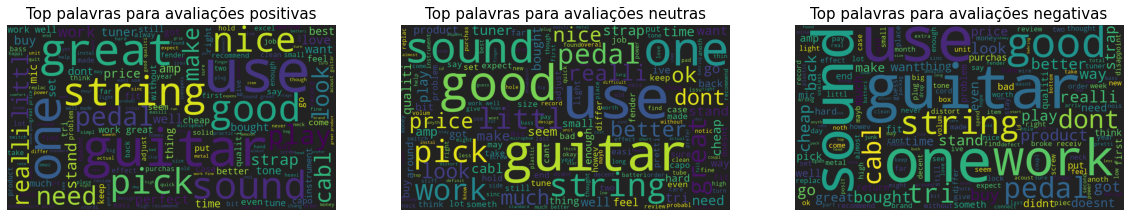

In [26]:
maskPos = np.array(Image.open('assets/img.png'))
wcPos = WordCloud(
    background_color='#222', 
    max_words=200, 
    mask=maskPos,
)

maskNeu = np.array(Image.open('assets/img.png'))
wcNeu = WordCloud(
    background_color='#222', 
    max_words=200, 
    mask=maskNeu,
)

maskNeg = np.array(Image.open('assets/img.png'))
wcNeg = WordCloud(
    background_color='#222', 
    max_words=200, 
    mask=maskNeg,
)

wcPos.generate(' '.join(text for text in df1.loc[df1['rating'] == 'positivo', 'reviewTextClean']))
wcNeu.generate(' '.join(text for text in df1.loc[df1['rating'] == 'neutro', 'reviewTextClean']))
wcNeg.generate(' '.join(text for text in df1.loc[df1['rating'] == 'negativo', 'reviewTextClean']))

fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].set_title('Top palavras para avaliações positivas', fontdict={'size': 15})
ax[0].imshow(wcPos)
ax[0].axis('off')

ax[1].set_title('Top palavras para avaliações neutras', fontdict={'size': 15})
ax[1].imshow(wcNeu)
ax[1].axis('off')

ax[2].set_title('Top palavras para avaliações negativas', fontdict={'size': 15})
ax[2].imshow(wcNeg)
ax[2].axis('off')

plt.show()

**Visualização das principais palavras com barchat**<br/>

A nuvem de palavras é bonita e agradável de ver, mas não é a melhor maneira de apresentar quais são as principais palavras para cada tipo de mensagem. Por isso, vamos criar um barchart para visualizar as informações de maneira mais limpa e profissional. Vamos visualizar as 15 principais ocorrências em cada categoria de avaliação.

In [27]:
fig = go.Figure()
lst_rating = ['positivo', 'neutro', 'negativo']
for i in range(len(lst_rating)):
    _lista = df1.loc[df1['rating'] == lst_rating[i], 'reviewTextClean']
    _text = ' '.join(frase for frase in _lista)
    _word = word_tokenize(_text)
    _df1 = pd.DataFrame(_word).value_counts()[0:15]

    _df1 = pd.DataFrame(_df1, columns=['quantidade'])
    _df1.reset_index(inplace=True)
    _df1.columns = ['palavra', 'quantidade']


    fig.add_trace(go.Bar(
        x=_df1['palavra'], 
        y=_df1['quantidade'], 
        name=lst_rating[i]
        ))

fig.update_layout(
    title='<span>Principais palavras de cada categoria (positivo, negativo e neutro))</span>', 
    autosize=False,
    width=1000,
    height=500,
    xaxis=dict(title='<span>Palavras</span>'),
    yaxis=dict(title='<span>Quantidade de ocorrências</span>'),
    template='my_theme'
    )

### 4) Vetorization

Atualmente, temos as mensagens como listas de tokens (também conhecidas como lemas) e agora precisamos converter cada uma dessas mensagens em um vetor com o qual os modelos de algoritmo do Scikit Learn possam trabalhar.<br/>
Faremos isso em três etapas usando o modelo bag-of-words:
1. Contar quantas vezes uma palavra ocorre em cada mensagem (conhecida como *term frequency*)
2. Pesar as contagens, para que os tokens frequentes tenham um peso menor (*inverse document frequency*)
3. Normalizar os vetores para o comprimento da unidade, para abstrair do comprimento do texto original (*L2 norm*)

Vamos para a primeira etapa:<br/>
Cada vetor terá tantas dimensões quantas forem as palavras únicas no corpus da mensagem. Primeiro usaremos o CountVectorizer do Scikit Learn. Este modelo converterá uma coleção de documentos de texto em uma matriz de contagens de token.<br/>
Podemos imaginar isso como uma matriz bidimensional. Onde a dimensão 1 é todo o vocabulário (1 linha por palavra) e a outra dimensão são os documentos reais, neste casa uma coluna por mensagem de texto.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

A partir de agora iremos trabalhar com arrays, x para os features e y para o target.

In [29]:
#Vamos jogar nosso atributo message_clean e nossa variável target em arrays x e y
x = df1['reviewTextClean']
y = df1['target']

print(len(x), len(y))

9207 9207


##### 4.1) CountVectorizer

In [30]:
#Vamos dividir nosso conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

6905 6905
2302 2302


In [31]:
# Vamos instanciar e treinar nosso CountVectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [32]:
#Agora nós utilizar o modelo treinado para criar nossa document-term matrix para os arrays de treino e teste.
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

##### 4.2) TF-IDF

Na recuperação de informação, tf-idf, TF-IDF, ou TFIDF, abreviação do termo *Term Frequency-inverse document frequency*, é uma estatística numérica que se destina a refletir a importância de uma palavra para um documento em uma coleção ou corpus. Como fator de ponderação em buscas de recuperação de informações, mineração de textos e modelagem de usuários. O valor tf-idf aumenta proporcionalmente ao número de vezes que uma palavra aparece no documento e é compensado pelo número de documentos no corpus que contêm a palavra, o que ajuda a ajustar o fato de que algumas palavras aparecem com mais frequência em geral.

In [33]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)


x_train_tfidf = tfidf_transformer.transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

### 5) Modelagem

Agora vamos partir para a parte mais glamourosa do trabalho de um cientista de dados, criar o modelo que realizará as previsões. Eu decidi dividir em dois capítulos para ficar mais organizado. O primeiro capítulo vamos criar modelos utilizando o Naive Bayes e também o XGBoost. Já nos próximos capítulos vamos criar duas redes neurais recorrentes, a primeira LSTM e a segunda vamos criar o modelo BERT.

In [34]:
import plotly.figure_factory as ff
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [35]:
#Lista para exibir os resultados obtidos e salvar em um DataFrame posteriormente.
lista_resultados = []

resultado = {
    'MÉTODO': '',
    'ACURÁCIA': ''
}

Antes de mais nada, vou criar uma função para gerar o gráfico contendo a confusion matrix, para visualizar os resultados obtidos de maneira mais personalizada.

In [36]:
x_axes = ['negativo', 'neutro', 'positivo']
y_axes =  ['positivo', 'neutro', 'negativo']
#Caso a implementação seja feita considerando apenas avaliações positivas e avaliações negativas.
#x_axes = ['negativo', 'positivo']
#y_axes =  ['positivo', 'negativo']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(
        title_text='<b>Confusion matrix</b>',
        xaxis = dict(title='Valores previstos'),
        yaxis = dict(title='Valores reais'),
        width=600,
        height=400,
        template = 'my_theme'
        )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

##### 5.1) Naive Bayes

Em estatística, os classificadores Naive Bayes são uma família de "classificadores probabilísticos" simples baseados na aplicação do teorema de Bayes com suposições de independência fortes (ingênuas) entre os recursos. Eles estão entre os modelos de rede bayesiana mais simples, mas juntamente com a estimativa de densidade do kernel, eles podem atingir níveis de precisão mais altos.<br/>

Os classificadores Naive Bayes são altamente escaláveis, exigindo uma série de parâmetros lineares no número de variáveis (características/preditores) em um problema de aprendizado. O treinamento de probabilidade máxima pode ser feito avaliando uma expressão de forma fechada, que leva tempo linear, em vez de uma aproximação iterativa cara, como usada para muitos outros tipos de classificadores.

In [37]:
# Create o modelo Multinomial Naive Bayes
nb = MultinomialNB()

# Treinamento do modelo
nb.fit(x_train_tfidf, y_train)

# Realização das previsões
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

#Visualizando os resultados
resultadosNB = round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2)
print('Os dados de testes obtiveram a acurácia de: {}%'.format(resultadosNB))

#Salvando resultado
resultado = {
    'MÉTODO': 'Naive Bayes',
    'ACURÁCIA': resultadosNB
}
lista_resultados.append(resultado)

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Os dados de testes obtiveram a acurácia de: 88.53%


**Problema**<br/>
Vemos que o modelo obteve 89% de acurácia. De primeira vista parece ser um ótimo resultado. Mas, contudo, todavia, entretanto, o modelo previu como sendo todas as avaliações positivas. Ele está sofrendo de overfitting.<br/>
Podemos tomar algumas decisões:
* Trocar de algoritmo;
* Ajustar os parâmetros do CountVectorizer ou do TF-IDF;
* Balancear o dataset para que fique com quantidades de classes mais ou menos iguais. 

##### 5.2) SVM

O algoritmo Support Vector Machine traça uma reta e tenta separar linearmente e classificar o conjunto de dados. O algoritmo tenta encontrar a reta que tenha maior distância dentre as classes prevista.<br/>

Para aplicar o SVC em conjuntos de dados não linearmente separáveis é necessário configurar o parâmetro Kernel. Este parâmetro é responsável por traçar não somente retas, mas também outros tipos de linhas no conjunto de dados.

In [38]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', SVC(decision_function_shape='ovo'))
])

# Treiamento do modelo
pipe.fit(x_train, y_train)

# Realização das previsões
y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

#Visualizando os resultados
resultadosSVM = round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2)
print('Acurácia do treinamento: {}%'.format(round(metrics.accuracy_score(y_train, y_pred_train) * 100, 2)))
print('Acurácia dos testes: {}%'.format(resultadosSVM))


#Salvando resultado
resultado = {
    'MÉTODO': 'SVM',
    'ACURÁCIA': resultadosSVM
}
lista_resultados.append(resultado)

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Acurácia do treinamento: 93.83%
Acurácia dos testes: 88.62%


É, deu uma melhorada, agora ele previu corretamente algumas avaliações neutras, mas ainda está muito aquém do aceitável. Vamos tentar outro modelo.

##### 5.3) Logistic Regression

A regressão logística é um algoritmo de aprendizagem de máquina supervisionado utilizado para classificação, apesar de ter a palavra regressão em seu nome.
Esta consiste em analisar cada classe de forma separada contra todas as outras, criando um classificador para cada possibilidade, dessa forma se calcula a probabilidade de uma dada instância pertencer a classe em questão ou não. Ao final, a classe selecionada será aquela que apresentar a maior probabilidade.

In [39]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', LogisticRegression(penalty='l2'))
])

# Treiamento do modelo
pipe.fit(x_train, y_train)

# Realização das previsões
y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

#Visualizando os resultados
resultadosLR = round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2)
print('Acurácia do treinamento: {}%'.format(round(metrics.accuracy_score(y_train, y_pred_train) * 100, 2)))
print('Acurácia dos testes: {}%'.format(resultadosLR))


#Salvando resultado
resultado = {
    'MÉTODO': 'Logistic Regression',
    'ACURÁCIA': resultadosLR
}
lista_resultados.append(resultado)

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Acurácia do treinamento: 90.27%
Acurácia dos testes: 89.05%


Opa, boas notícias! A Regressão logística se saiu muito bem. O modelo foi capaz de realizar a previsão corretamente de avaliações negativas e também de avaliações neutras. Foram poucas previsões, mas devemos levar em consideração que o dataset está completamente enviesado.

##### 5.4) XGBoost

O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting. XGBoost e Gradient Boosting Machines (GBMs) são ambos métodos de árvore que aplicam o princípio de impulsionar weak learners usando a arquitetura de gradiente descendente. No entanto, o XGBoost aprimora a estrutura básica do GBM por meio da otimização de sistemas e aprimoramentos algorítmicos.<br/>

Em problemas de previsão envolvendo dados não estruturados, como imagens, textos e vídeos, as redes neurais artificiais tendem a superar vários outros algoritmos ou frameworks. No entanto, quando se trata de dados estruturados/tabulares, algoritmos baseados em árvore de decisão são considerados os melhores da sua classe no momento<br/>

Desde a sua criação, o algoritmo XGBoost tem sido o mais vitorioso no Kaggle. Além disso, também tem sido utilizado em várias aplicações de ponta na indústria. Por isso decidi trazê-lo para este projeto, vamos implementar utilizando o Pipeline de execuções também.

In [40]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.05,
        max_depth=30,
        n_estimators=100,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

# Treiamento do modelo
pipe.fit(x_train, y_train)

# Realização das previsões
y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

#Visualizando os resultados
resultadosXGB = round(metrics.accuracy_score(y_test, y_pred_class) * 100, 2)
print('Acurácia do treinamento: {}%'.format(round(metrics.accuracy_score(y_train, y_pred_train) * 100, 2)))
print('Acurácia dos testes: {}%'.format(resultadosXGB))


#Salvando resultado
resultado = {
    'MÉTODO': 'XGBoost',
    'ACURÁCIA': resultadosXGB
}
lista_resultados.append(resultado)

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Acurácia do treinamento: 99.8%
Acurácia dos testes: 89.14%


Que legal! Consiguimos com o método do XGBoost obter 89% nos testes, mas dessa vez o modelo também previu avaliações neutras e negativas, tornando o algoritmo bem mais confiável. Mas será que ele pode melhorar? Para isso, poderia sugerir algumas alterações:
* Ajustar os parâmetros do CountVecotrizer e do TF-IDF;
* Balancear o conjunto de dados;
* Ajustar os parâmetros do próprio algoritmo XGBoost, tais como: learning_rate, max_depth, n_estimatos, para mais consulte a documentação do algoritmo.

### 6) LSTM

As redes neurais do tipo Long Short Term Memory (memória de curto e longo prazo) são um tipo especial de rede neural recorrente e capazes de aprender conexões em sequências de informação. Dentre as principais aplicações das redes neurais Long Short Term Memory destacam-se: processamento de tarefas de linguagem natural; processamento de áudio; e processamento de uma sequência de frames de vídeo.<br/>

Eu fiz uma explicação bem detalhada no meu outro projeto: "Classificando mensagens como SPAM ou HAM".

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy

Vamos setar algumas configurações para utilizar a GPU como alternativa principal para a execução do Tensorflow. Link da documentação sobre como utilizar a GPU com o Tensorflow: https://www.tensorflow.org/guide/gpu

In [42]:
tf.debugging.set_log_device_placement(True)
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [43]:
#Para trabalhar com LSTMs eu vou simplificar o problema, vamos tentar prever se a avaliação foi positiva ou negativa.
target_map = {
    'positivo': 1,
    'neutro': 0,
    'negativo': 0
}

df2 = df.copy()
df2['target'] = df2['rating'].map(target_map)
df2 = df2.loc[df2['reviewTextLen'] < 200]

In [44]:
df2['target'].unique()

array([1, 0], dtype=int64)

In [45]:
#Vamos jogar nosso atributo message_clean e nossa variável target em arrays x e y
x = df2['reviewTextClean']
y = df2['target']

print(len(x), len(y))

9207 9207


In [46]:
#Vamos dividir nosso conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

6905 6905
2302 2302


##### 6.1) Tokenization

Precisamos realizar **tokenização** - o processamento de segmentação de texto em frases de palavras. O benefício da tokenização é que ela coloca o texto em um formato mais fácil de converter em números brutos, que podem ser usados para processamento.

In [47]:
texts = df2['reviewTextClean']
target = df2['target']

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

15179

##### 6.2) Pad Sequences

O método pad_sequences transforma uma lista (de comprimento num_samples) de sequências (listas de inteiros) em uma matriz Numpy 2D de forma (num_samples, num_timesteps). num_timesteps é o argumento maxlen, se fornecido, ou o comprimento da sequência mais longa na lista.

In [48]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[   4,   28,  893, ...,    0,    0,    0],
       [3837,   29,  201, ...,    0,    0,    0],
       [  84,   10, 1544, ...,    0,    0,    0],
       ...,
       [ 477,  146,    3, ...,    0,    0,    0],
       [   4,  598,   46, ...,    0,    0,    0],
       [   5,   19,  151, ...,    0,    0,    0]])

##### 6.3) GloVe

O método GloVe se baseia em uma ideia importante,
> Você pode derivar relações semânticas entre palavras da matriz de co-ocorrência.

Para obter uma representação vetorial para as palavras, podemos usar um algoritmo de aprendizado não supervisionado chamado GloVe (Global Vectors for Word Representation), que se concentra em co-ocorrências de palavras em todo o corpus. Seus embeddings estão relacionados às probabilidades de duas palavras aparecerem juntas.<br/>
Word embeddings são basicamente uma forma de representação de palavras que conecta o entendimento humano da linguagem ao de uma máquina. Eles aprenderam representações de texto em um espaço n-dimensional onde palavras que têm o mesmo significado têm uma representação semelhante. O que significa que duas palavras semelhantes são representadas por vetores quase semelhantes que estão muito próximos em um espaço vetorial.<br/>
Assim, ao usar a incorporação de palavras, todas as palavras individuais são representadas como vetores de valor real em um espaço vetorial predefinido. Cada palavra é mapeada para um vetor e os valores do vetor são aprendidos de uma maneira que se assemelha a uma rede neural.<br/>

Vamos utilizar o arquivo pré-treinado. Eu criei um diretório chamado lib que não estará no projeto pois o mesmo está no .gitignore, mas o arquivo pode ser encontrado e baixado no seguinte link: https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt

In [49]:
embeddings_dictionary = dict()
embedding_dim = 100

# Carregando GloVe 100D embeddings
with open('lib/glove.6B.100d.txt', encoding="utf8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

In [50]:
#Agora vamos carregar vetores de embeddings dessas palavras que aparecem no dicionário Glove. Outros serão inicializados em 0.
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

##### 6.5) Criação do modelo

In [51]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [52]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.36917999,  0.6997    , -0.044431  , ..., -0.95001   ,
         1.11029994, -0.089088  ],
       [-0.36531001,  0.31784999, -0.32047001, ..., -0.70363998,
         0.96908998,  0.021153  ],
       ...,
       [ 0.86023998,  0.69993001, -0.83978999, ...,  0.20189001,
         0.22011   , -0.16159999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Aqui tem um guia completo sobre loss_function (cost_function), e o porque de utilizar cada uma das funções: https://analyticsindiamag.com/ultimate-guide-to-loss-functions-in-tensorflow-keras-api-with-python-implementation/

In [53]:
def glove_lstm():

    with strategy.scope():
        model = Sequential()
        
        model.add(Embedding(
            input_dim=embedding_matrix.shape[0], 
            output_dim=embedding_matrix.shape[1], 
            weights = [embedding_matrix], 
            input_length=length_long_sentence
        ))
        
        model.add(Bidirectional(LSTM(
            length_long_sentence, 
            return_sequences = True, 
            recurrent_dropout=0.2
        )))
        
        model.add(GlobalMaxPool1D())
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(length_long_sentence, activation = "relu"))
        model.add(Dropout(0.5))
        model.add(Dense(length_long_sentence, activation = "relu"))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation = 'sigmoid'))
        #model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
        #cce_loss = CategoricalCrossentropy()
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
            
    return model

model = glove_lstm()
model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Abaixo você pode carregar e treinar o modelo do zero e mais abaixo você pode carregar os pesos que eu já havia treinado anteriormente.

In [ ]:
# Carregando e relizando a previsão
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'modelLSTM.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 5,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

In [74]:
# Carregando o arquivo já treinado
model = glove_lstm()
model.load_weights('modelLSTM.h5')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/

Vamos criar gráfico para visualizar a taxa de aprendizagem e a função de perda ao longo das épocas do treinamento do modelo.

In [56]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [ ]:
#Para exibir o gráfico você precisará realizar o treinamento para obter o histórico
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [67]:
y_preds = (model.predict(X_test)).astype("int32")
resultadosLstm = round(model.evaluate(y_preds,y_test)[1] * 100, 2)
#conf_matrix(metrics.confusion_matrix(y_test, y_preds))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

In [71]:
#Salvando resultado
resultado = {
    'MÉTODO': 'LSTM',
    'ACURÁCIA': resultadosLstm
}
lista_resultados.append(resultado)

print('Os dados de treinos obtiveram a acurácia de: {}%'.format(resultadosLstm))

Os dados de treinos obtiveram a acurácia de: 87.79%


Vemos que a acurácia do modelo LSTM foi razoável também. Mesmo com o dataset desbalanceado ele obteve uma precisão de 87%, porém, assim como o Naive Bayes, ele sofre com o problema de realizar praticamente todas as previsões como sendo da mesma classe.

### 7) Considerações finais

Este projeto se propôs a realizar a classificação de análise de sentimentos de usuários em relação a avaliação de produtos musicias vendidos pela Amazon. No decorrer deste notebook fizemos várias transformações nos dados a fim de deixá-los mais limpos para daí então aplicar os modelos de Machine Learning e Deep Learning.<br/>

O projeto teve uma enorme dificuldade por conta do dataset estar muito desbalanceado, mas apesar disso, ainda conseguimos obter bons resultados em alguns modelos de Machine Learning.<br/>

A primeira parte foi aplicar os algoritmos de Machine Learning, aplicamos o Naive Bayes, depois aplicamos o modelo de Support Vector Machines (SVM), aplicamos também a Regressão Logística, e por fim, aplicamos o XGBoost, o algoritmo campeão das competições Kaggle.<br/>

Na segunda parte da modelagem, aplicamos os métodos mais modernos para realizar a previsão em processamento de linguagem natural, as redes neurais profundas. Utilizamos as LSTMs (Long-short-term-memory), modelo baseado em aprendizado por memória de curto e/ou longo prazo.<br/>

##### *7.1) Resultados obtidos*

In [72]:
pd.DataFrame(lista_resultados).sort_values(by='ACURÁCIA', ascending=False)

,MÉTODO,ACURÁCIA
3,XGBoost,89.14
2,Logistic Regression,89.05
1,SVM,88.62
0,Naive Bayes,88.53
4,LSTM,87.79


-----

Vemos que a nossa rede neural não foi boa nesse caso, ela obteve o pior desempenho dentre todos os métodos testados, por outro lado o algoritmo XGBoost obteve um resultado bastante expressivo, superando o Naive Bayes, que é tido como o principal algoritmo de Machine Learning para processamento de linguagem natural. O Naive Bayes que por sua vez também não conseguiu se sair bem, pois ele previu todas as classes como sendo 'avaliações positivas'.<br/>

Os estudos continuam, NLP é um tema fascinante e com infinitas possibilidades. Durante este notebook foram apresentados vários algoritmos e arquiteturas diferentes. Porém, os passos podem ser considerados 'genéricos' e facilmente aplicados a outros problemas de classificação de textos. Portanto, o conteúdo visto aqui pode ser transcrito para a realização da resolução de outros problemas.

**Sugestões de trabalhos futuros**<br/>
Como pudemos estudar, a maioria dos passos de análise e também de modelagem foram passos genéricos, sendo um projeto altamente generalizável, dessa forma, este projeto pode ser aplicado para praticamente qualquer problema desse mesmo tipo (classificação de textos). Sugiro alguns projetos:
* Prever fato ou fake news a partir de notícias ou tweets;
* Análise de sentimento de tweets;